## Simple PCA Implementation

Note - this is simply meant to show how to use PCA to decrease the dimension of a dataset in R<sup>2</sup> to R<sup>1</sup>

Steps:

1. Standard normalize the data
2. Compute the covariance matrix sigma
3. Compute eigenvectors of sigma
4. Transform the data using the matrix of eigenvectors

Additional:

1. Get back to original feature data
2. Compute the average squared projection error

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import latex
import random

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # 2x features

In [3]:
# There are two features and 150 examples
X.shape

(150, 2)

### Performing standard normalization of the data

In [4]:
x1 = X[:,0]
x1.shape = (150,1)
x2 = X[:,1]
x2.shape = (150,1)
x1 = (x1 - np.average(x1)) / np.std(x1)
x2 = (x2 - np.average(x2)) / np.std(x2)
x1.shape = (150,)
x2.shape = (150,)
X[:,0] = x1
X[:,1] = x2
X.shape

(150, 2)

In [12]:
# Old data head
X[:10]

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536]])

### Computing sigma matrix (covariance matrix)

$$ sigma = (\frac{1}{m}) * X^TX $$

- X: shape(150,2)
- X<sup>T</sup>: shape(2,150)
- X<sup>T</sup>X: shape(2,2)

In [5]:
m = X.shape[0]
sigma = (1/m) * np.dot(X.T,X)
sigma.shape

(2, 2)

In [6]:
sigma

array([[ 1.        , -0.10936925],
       [-0.10936925,  1.        ]])

### Compute Eigenvectors for sigma

In [7]:
u = np.linalg.svd(sigma)
U = u[0]
S = u[1]
U.shape

(2, 2)

In [8]:
U = U[:,0]
U.shape = (2,1)

In [9]:
U

array([[-0.70710678],
       [ 0.70710678]])

## Calculating new data in R<sup>1</sup> space

- X: shape(150,2)
- U: shape(2,1)
- XU: shape(150,1)

In [10]:
new_X = np.dot(X,U)
new_X.shape

(150, 1)

In [11]:
# New data head
new_X[:10]

array([[1.36665243],
       [0.71987664],
       [1.2184871 ],
       [1.14053912],
       [1.61595765],
       [1.76412298],
       [1.63141893],
       [1.28870444],
       [0.98464315],
       [0.88350325]])

## Getting back to estimate of data in R<sup>2</sup> space (reconstruction)

- new_X: shape(150,1)
- U<sup>T</sup>: shape(1,2)
- XU<sup>T</sup>: shape(150,2)

In [13]:
old_X_est = np.dot(new_X,U.T)
old_X_est.shape

(150, 2)

In [14]:
# Reconstruction head
old_X_est[:10]

array([[-0.9663692 ,  0.9663692 ],
       [-0.50902966,  0.50902966],
       [-0.86160049,  0.86160049],
       [-0.80648294,  0.80648294],
       [-1.14265462,  1.14265462],
       [-1.24742332,  1.24742332],
       [-1.15358739,  1.15358739],
       [-0.91125165,  0.91125165],
       [-0.69624785,  0.69624785],
       [-0.62473114,  0.62473114]])

## Getting the Squared Projection Error

$$ error = \frac{\sum_{i=1}^{k}S_{ii}}{\sum_{i=1}^{n} S_{ii}}$$

- n: number of original dimensions for data
- k: number of dimensions after pca

Note that the projection error in this case is relatively attrocious, most likely due to the fact that x1 and x2 in the original dataset are not strongly correlated with each other.

In [15]:
S.shape = (2,1)
proj_error = np.asscalar(S[0]) / np.sum(S)
proj_error

0.5546846249753248

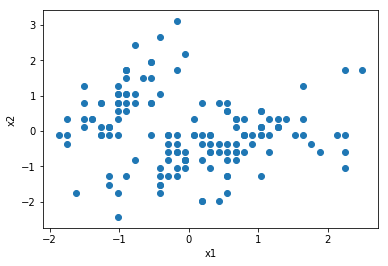

correlation value: -0.10936924995064937


In [16]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
print("correlation value:",np.corrcoef(X[:,0],X[:,1])[0,1])

## Testing implementation with sklearn functions

In [17]:
# I am using the implementation from sklearn for comparison
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
new_X_act = pca.fit_transform(X)

In [18]:
# Testing the new data in R1 space
# Note - Due to sklearn implementation choices, the signs of my implementation are all opposite when compared
# This checks that the magnitudes and "signs" are the same - near 0 so correct
np.sum(new_X_act - (-new_X))

-2.6277591214096674e-14

In [19]:
# Testing reconstruction
# This checks that the magnitudes and "signs" are the same - near 0 so correct
old_X_act = pca.inverse_transform(new_X)
np.sum(old_X_act - (-old_X_est))

-1.1973061431191923e-13

In [20]:
# Testing the explained ratio variance
# Near zero - thus my explained variance value is correct
var_act = np.asscalar(pca.explained_variance_ratio_)
var_act - proj_error

-1.1102230246251565e-16